In [1]:
from sklearn.linear_model import LogisticRegression
from collections import defaultdict
import numpy as np
import utils
import matplotlib.pyplot as plt

Import utilities and obtain dictionary of accuracies

In [2]:
path = r"../data_files/parquet_by_conductors/ecq_B_200_cond_0_123456_one_per_iso.parquet"
df = utils.load_data(path)

# choose your desired bounds (including the end points)
bounds_list = [(i**2-600, i**2+600) for i in range(50, 260, 10)]

# choose your model
model = LogisticRegression(max_iter = 3000)

# choose your desired step size for number of a_p's
step_size = 1
res_dict={}

# Obtain dictionary of conductor bounds and corresponding number of ap values
for bounds in bounds_list:
    lower_bound, upper_bound = bounds
    bound = int(np.sqrt((upper_bound + lower_bound) / 2))
    cumulative_dict = defaultdict(lambda: [0, 0])  # [cumulative sum, count]

    for i in range(100):  # Repeat 100 times
        res_df = utils.Generate_AccByNumAps_df(df, lower_bound, upper_bound, model, step_size=step_size, random_state=42+i)
        temp_dict = utils.find_min_num_a_p_for_accuracy_thresholds(res_df)
        
        # Update cumulative sums and counts, checking for NaN
        for key, value in temp_dict.items():
            if not np.isnan(value):  # Check if value is not NaN
                cumulative_dict[key][0] += value
                cumulative_dict[key][1] += 1

    # Calculate averages and assign to res_dict, excluding keys with NaN values
    res_dict[bound] = {key: sum_count[0] / sum_count[1] for key, sum_count in cumulative_dict.items() if sum_count[1] > 0}

    print(f"The square root of conductor {bound} needs the following number of ap values: {res_dict[bound]}")


Loaded the big dataset with 200 a_p's and 541081 curves..


/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)
/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)
/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of D

The square root of conductor 50 needs the following number of ap values: {0.98: 45.05, 0.95: 26.33, 0.9: 17.27, 0.85: 12.89, 0.8: 9.15, 0.75: 7.08, 0.7: 5.98, 0.99: 99.890625}


/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)
/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)
/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of D

The square root of conductor 60 needs the following number of ap values: {0.98: 69.01020408163265, 0.95: 35.5, 0.9: 22.76, 0.85: 16.34, 0.8: 11.63, 0.75: 8.24, 0.7: 7.04, 0.99: 93.8}


/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)
/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)
/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of D

The square root of conductor 70 needs the following number of ap values: {0.95: 41.74, 0.9: 25.78, 0.85: 17.67, 0.8: 11.9, 0.75: 8.82, 0.7: 7.1, 0.98: 98.4888888888889, 0.99: 122.5}


/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)
/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)
/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of D

The square root of conductor 80 needs the following number of ap values: {0.98: 104.80898876404494, 0.95: 51.73, 0.9: 31.59, 0.85: 21.22, 0.8: 14.25, 0.75: 9.6, 0.7: 7.77, 0.99: 178.0}


/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)
/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)
/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of D

The square root of conductor 90 needs the following number of ap values: {0.98: 147.3448275862069, 0.95: 69.18, 0.9: 40.9, 0.85: 24.96, 0.8: 17.95, 0.75: 12.04, 0.7: 9.4}


/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)
/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)
/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of D

The square root of conductor 100 needs the following number of ap values: {0.95: 81.87, 0.9: 48.74, 0.85: 30.66, 0.8: 20.09, 0.75: 11.73, 0.7: 9.44, 0.98: 160.66666666666666}


/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)
/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)
/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of D

The square root of conductor 110 needs the following number of ap values: {0.95: 105.2, 0.9: 57.14, 0.85: 38.49, 0.8: 24.32, 0.75: 15.17, 0.7: 10.85, 0.98: 183.0}


/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)
/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)
/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of D

The square root of conductor 120 needs the following number of ap values: {0.95: 111.08, 0.9: 58.28, 0.85: 35.73, 0.8: 23.19, 0.75: 13.92, 0.7: 11.08}


/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)
/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)
/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of D

The square root of conductor 130 needs the following number of ap values: {0.95: 141.75, 0.9: 69.74, 0.85: 41.4, 0.8: 23.55, 0.75: 14.3, 0.7: 11.14}


/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)
/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)
/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of D

The square root of conductor 140 needs the following number of ap values: {0.95: 172.94871794871796, 0.9: 81.72, 0.85: 49.78, 0.8: 29.63, 0.75: 17.29, 0.7: 13.31}


/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)
/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)
/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of D

The square root of conductor 150 needs the following number of ap values: {0.9: 88.4, 0.85: 55.5, 0.8: 34.46, 0.75: 19.36, 0.7: 14.13, 0.95: 176.1290322580645}


/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)
/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)
/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of D

The square root of conductor 160 needs the following number of ap values: {0.9: 111.0, 0.85: 65.56, 0.8: 39.56, 0.75: 22.46, 0.7: 15.06}


/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)
/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)
/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of D

The square root of conductor 170 needs the following number of ap values: {0.9: 113.14, 0.85: 61.9, 0.8: 37.44, 0.75: 22.92, 0.7: 15.8, 0.95: 197.0}


/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)
/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)
/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of D

The square root of conductor 180 needs the following number of ap values: {0.9: 139.28, 0.85: 79.34, 0.8: 46.69, 0.75: 25.02, 0.7: 16.47}


/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)
/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)
/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of D

The square root of conductor 190 needs the following number of ap values: {0.9: 125.48, 0.85: 63.94, 0.8: 34.64, 0.75: 20.38, 0.7: 15.25}


/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)
/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)
/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of D

The square root of conductor 200 needs the following number of ap values: {0.9: 163.86868686868686, 0.85: 94.41, 0.8: 48.16, 0.75: 25.62, 0.7: 17.59}


/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)
/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)
/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of D

The square root of conductor 210 needs the following number of ap values: {0.9: 171.70454545454547, 0.85: 88.24, 0.8: 43.29, 0.75: 24.32, 0.7: 17.98}


/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)
/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)
/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of D

The square root of conductor 220 needs the following number of ap values: {0.85: 116.13, 0.8: 58.71, 0.75: 32.99, 0.7: 21.09, 0.9: 192.27272727272728}


/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)
/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)
/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of D

The square root of conductor 230 needs the following number of ap values: {0.85: 97.25, 0.8: 46.41, 0.75: 26.81, 0.7: 19.76, 0.9: 177.88888888888889}


/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)
/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)
/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of D

The square root of conductor 240 needs the following number of ap values: {0.9: 186.64285714285714, 0.85: 111.35, 0.8: 61.32, 0.75: 31.27, 0.7: 21.61}


/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)
/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({'num_a_p': i, 'accuracy': res}, index = [0])], ignore_index = True)
/Users/angelicababei/ml_rnt/notebooks/utils.py:113: FutureWarning: The behavior of D

The square root of conductor 250 needs the following number of ap values: {0.85: 119.0, 0.8: 55.61, 0.75: 27.45, 0.7: 19.85, 0.9: 190.0}


Restructure the dictionary

In [8]:
# Initialize an empty dictionary to store the result
restructured_dict = {0.99: [], 0.98: [], 0.95: [], 0.9: [], 0.85: [], 0.8: [], 0.75: [], 0.7: []}


# Iterate through the original dictionary
for k, subdict in res_dict.items():
    # Iterate through each accuracy level in the restructured dictionary
    for accuracy in restructured_dict:
        # Check if the accuracy level exists in the subdictionary
        if accuracy in subdict:
            # Append the (k, v) pair to the corresponding list in the restructured dictionary
            restructured_dict[accuracy].append((k, subdict[accuracy]))



For each accuracy threshold in [0.99, 0.98, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7], plot points (square root of conductor, required number of ap's) in a different color, then fit a line for each separate threshold.

<>:26: SyntaxWarning: invalid escape sequence '\s'
<>:26: SyntaxWarning: invalid escape sequence '\s'
/var/folders/yf/__s9cndj6xs_hcwfwx8md2cm0000gp/T/ipykernel_36086/689779485.py:26: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel('$\sqrt{Conductor}$')


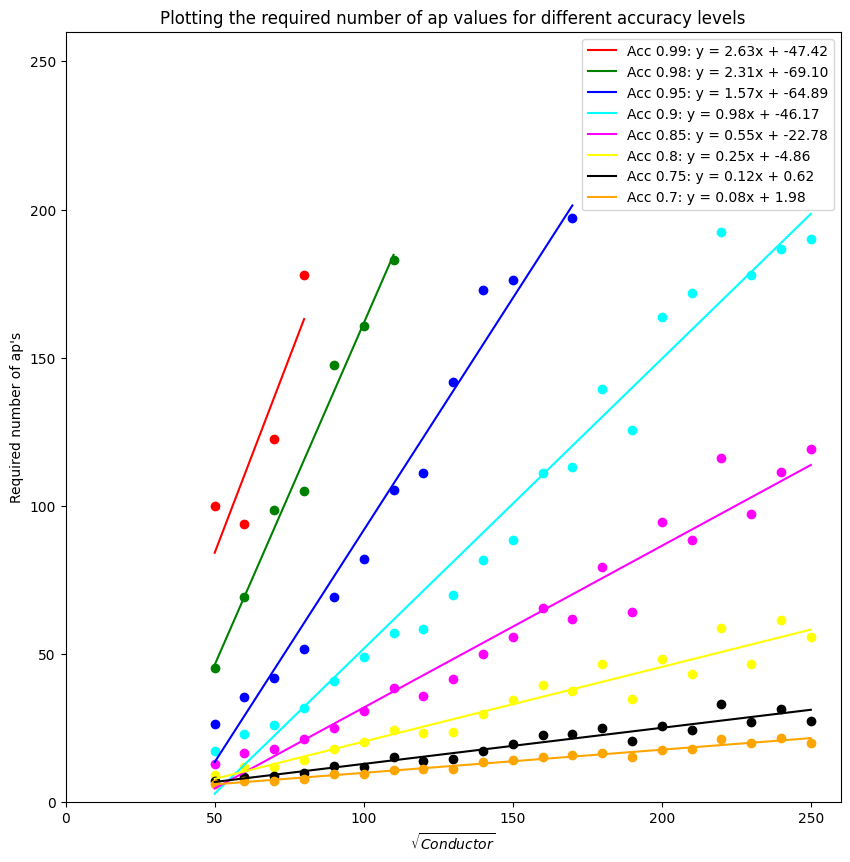

In [10]:
# Define colors for each subdictionary
colors = {0.99: 'red', 0.98: 'green', 0.95: 'blue', 0.9: 'cyan', 0.85: 'magenta', 0.8: 'yellow', 0.75: 'black', 0.7: 'orange'}

plt.figure(figsize=(10, 10))

for accuracy, pairs in restructured_dict.items():
    # Remove pairs with 'nan' values
    cleaned_pairs = [(x, y) for x, y in pairs if y > 0]
    if cleaned_pairs:
        x_vals, y_vals = zip(*cleaned_pairs)
        # Convert to numpy arrays for linear regression
        x_np = np.array(x_vals, dtype=np.float64)
        y_np = np.array(y_vals, dtype=np.float64)
        # Calculate the coefficients of the line of best fit
        m, b = np.polyfit(x_np, y_np, 1)
        # Plot the cleaned scatter plot
        plt.scatter(x_vals, y_vals, color=colors[accuracy])
        # Plot the line of best fit
        plt.plot(x_np, m*x_np + b, color=colors[accuracy], label=f'Acc {accuracy}: y = {m:.2f}x + {b:.2f}')

# Set the limits of the x and y axes
plt.xlim(0, 260)
plt.ylim(0, 260)

# Add labels and legend
plt.xlabel('$\sqrt{Conductor}$')
plt.ylabel("Required number of ap's")
plt.title('Plotting the required number of ap values for different accuracy levels')
plt.legend()

# Show the plot
plt.show()